````{grid} 2
```{grid-item-card}
:class-header: bg-light
Voraussetzungen
^^^
- Matlab Grundkenntnisse
```
```{grid-item-card}
:class-header: bg-light
Lerninhalte
^^^
- Fähigkeit besseren Code zu generieren
```
````


(best_practices)=
# Best Practices

Oft gibt es viele Wege die zum Ziel führen, so ist es auch bei der Programmierung. Hier sollen einige Programmierrichtlinien aufgelistet werden, die sich bewährt haben. Die meisten davon lassen sich allgemein auf alle Programmiersprachen anwenden, einige wenige sind Matlab-spezifisch.

In diesem Kurs wird nicht erwartet, dass Sie sofort perfekten Code schreiben und sich immer und überall an all diese Richtlinien halten. Es kann aber nicht schaden sich beim Erlernen einer neuen Programmiersprache früh mit diesen Ansprüchen vertraut zu machen und sie im Hinterkopf zu haben. Zumindest die ersten beiden Punkte sollten jedoch von Anfang an beherzigt werden.

## Unkommentierter bzw. nicht-dokumentierter Code ist schlechter Code

Wenn Sie ein Matlab- bzw. Octaveskript schreiben, haben Sie in der Regel eine genaue Vorstellung von dem was Ihr Skript macht und brauchen die Kommentare nicht als Verständnisstütze. Aus dem Grund ist es allzu leicht, auf die mühsame Kommentierung zu verzichten. Die Erfahrung zeigt aber, dass Ihre Gedankengänge bei der Programmierung schon nachdem Sie sich wenige Wochen nicht mehr mit dem Code auseinandergesetzt haben vergessen sind. Stellen Sie sich vor, nach drei Wochen stellt sich heraus, dass sich ein Bug eingeschlichen hat. Bei der Fehlersuche müssen Sie sich mühsam durch Ihren alten Code kämpfen und es ist im Nachhinein plötzlich nicht mehr ganz so einfach nachzuvollziehen, was Sie sich eigentlich dabei gedacht hatten. Spätestens in solchen Momenten fällt auf, wie wichtig Kommentierung ist. 

Zur Kommentierung gehört nicht nur, dass Sie beschreiben WAS der Code macht, sondern WARUM er so aussieht wie er aussieht. Am Anfang eines Skriptes sollte beschrieben sein, welchem Zweck das Programm dient. Am Anfang einer Funktion gilt dasselbe, wobei hier auch Beschreibungen der Ein- und Ausgabegrößen dazugehören. Wenn relevant, sollten hier auch physikalische Einheiten benannt werden!

In [1]:
%%file spherical2Cartesian.m
function p = spherical2Cartesian(longitude, latitude, elevation)
% This function takes spherical coordinates and transforms them to
% cartesian coordinates
%
% Inputs:
%    longitude: azimuth angle in degrees measured from xz-plane
%    latitude:  polar angle in degrees  measured from xy-plane
%    elevation: radial distance from origin (unit implied)
%
% Outputs:
%    p: cartesian point (unit as input)

p = [elevation*sind(longitude)*cosd(latitude); ...
     elevation*sind(longitude)*sind(latitude); ...
     elevation*cosd(longitude) ];

end

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/spherical2Cartesian.m'.


In [2]:
%%file sphericalGrid.m
% This script creates a regular grid on a sphere using spherical 
% coordinates in a 10-degree resolution and displays the points 
% in a 3D-plot

res = 10; % resolution in degrees

% first, preallocate (n,3)-Matrix to store the cartesian points
numPoints = numel(-180:res:180)*numel(-90:res:90);
p = zeros(numPoints, 3);

% fill the array of points using the spherical2Cartesian function
p_index = 1;
for long = -180:res:180
    for lat = -90:res:90
        p(p_index,:) = spherical2Cartesian(long, lat, 1);
        p_index = p_index + 1;
    end
end

% plot the result
scatter3(p(:,1), p(:,2), p(:,3), 'o');
axis equal;


Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/sphericalGrid.m'.


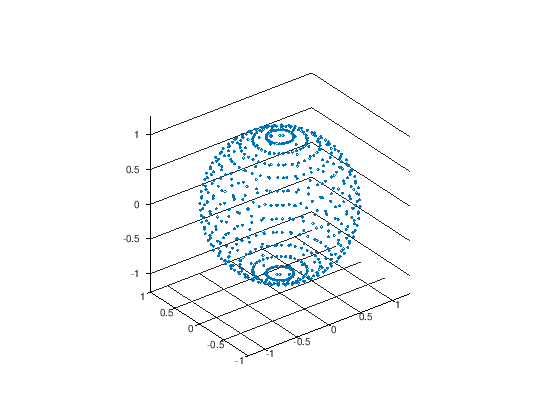

In [3]:
run sphericalGrid

Gerade im Beruf ist es sehr unwahrscheinlich, dass Sie alleine an einem Code arbeiten. Sobald mehrere Leute Ihren Code verwenden ist es klar, dass Sie Ihren Kolleg:innen oder Kund:innen das Leben erleichtern, in dem Sie klar kommentierten bzw. dokumentierten Code abliefern. Ein Code, der nicht verstanden wird, wird sehr schnell - berechtigterweise - als schlechter Code abgestempelt, auch wenn er äußerst clever programmiert wurde.

Spätestens wenn das Programm von einer größeren Zielgruppe benutzt werden soll, reicht eine reine Kommentierung nicht aus. Hier muss eine html- oder pdf-Dokumentation herhalten. Die Wichtigkeit von guter Dokumentation für die Verbreitung von Software ist kann nicht genung betont werden! Es gibt inzwischen einige Hilfsprogramme, die aus strukturierter Code-Kommentierung automatisiert eine solche Dokumentation erzeugen kann, Doxygen und Sphinx sind Beispiele. [Hier](https://github.com/gllmflndn/m2html) finden Sie ein Tool das spezifisch für Matlab entwickelt wurde.

Die Sprache der Kommentierung sollte sich natürlich an die Zielgruppe richten. Da sich die Zielgruppe häufig während der Lebenszeit eines Programmes ändert, bietet es sich an, von Anfang an eine Sprache zu wählen, die von sehr vielen Menschen verstanden wird. Wie oft haben wir schon eine Bibliothek nicht benutzt, nur weil die Dokumentation auf Französisch war.

## Sprechende Variablennamen

Damit ein Code verständlich ist, hilft es sprechende Variablen- und Funktionsnamen zu verwenden. Während man in mathematischen Gleichungen gerne Buchstaben und Symbole als Abkürzungen verwendet, sollte man im Code versuchen die Bedeutung einer Variable durch Ihren Namen auszudrücken. Im obigen Beispiel wurden anstatt der üblichen Bezeichnungen `theta`, `phi` und `r` für $(\Theta, \phi, r)$ die Variablennamen `longitude`, `latitude` und `elevation` benutzt, um auf die jeweilige Bedeutung hinzuweisen.

Der folgende Code entspricht semantisch dem obigen Beispiel, ist aber vollkommen unverständlich:

In [4]:
%%file xralkldaf.m
function peng = xralkldaf(xyz,pft,               hurz)
peng = [hurz*sind(xyz)*cosd(pft);hurz*sind(xyz)*sind(pft);hurz*cosd(xyz)];
end

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/xralkldaf.m'.


In [5]:
%%file rxlquapoeh.m
h=-180:10:180;g=-90:10:90;
kkkk=numel(h)*numel(g);qwerty=zeros(kkkk, 3);
c=1;
for b=h
    for a=g
        qwerty(c,:)=xralkldaf(b, a, 1);c=c+1;
    end
end
scatter3(qwerty(:,1),qwerty(:,2),qwerty(:,3),'o');axis equal;


Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/rxlquapoeh.m'.


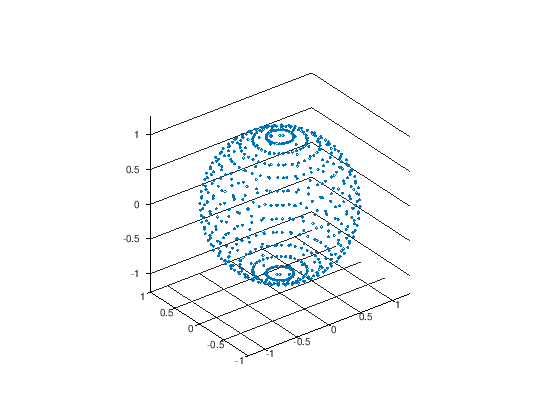

In [6]:
run rxlquapoeh

## Wiederholten Code vermeiden

Nicht selten müssen ähnliche oder identische Algorithmen mehrmals an verschiedenen Stellen im Code ausgeführt werden. So werden zum Beispiel im Laufe einer FEM-Berechnung sehr viele Polynominterpolationen ausgeführt. Wenn nun der Algorithmus der Polynominterpolation einmal geschrieben wird und mit Copy-und-Paste an die unterschiedlichen Stellen im Code verteilt wird, funktioniert das in der Regel, auch wenn derselbe Code mehrfach vorkommt und die Code-Basis unnötig vergrößert wird. 

Wenn sich jetzt aber ein Bug in der Polynominterpolation eingeschlichen hat, oder der Polynomgrad geändert werden muss, muss das an vielen Stellen im Code geschehen und die Gefahr ist groß, dass eine Stelle vergessen wird. Daher ist es viel sinnvoller, die Polynominterpolation in eine Funktion auszulagern, die an den diversen Stellen im Code aufgerufen wird. Die Code-Basis bleibt klein und Änderungen an der Funktion haben direkt an allen relevanten Stellen des Codes Effekt.


## Das Rad nicht neu erfinden

Zur Übung wird es Ihre Aufgabe sein, numerische Methoden wie das Lösen linearer Gleichungssysteme, das Newtonverfahren oder die Polynominterpolation mit Matlab bzw. Octave selber zu programmieren. Später in der Praxis macht es Sinn für solche Methoden die bereits zur Verfügung gestellten Bibliotheken zu benutzen. Diese sind seit langer Zeit im Einsatz, vielfach getestet und auf Performanz getrimmt. Sie müssen die Methoden nicht immer wieder neu implementieren. Wichtig ist aber, dass Sie verstehen wie sie funktionieren und an welchen Stellen unter Umständen Probleme auftreten können.

## Lange Skripte und Funktionen vermeiden

Gerade bei etwas komplexeren Algorithmen kann es schnell mal passieren, dass eine Funktion oder ein Skript mehrere Hundert Zeilen beansprucht. Für eine bessere Wartbarkeit und Lesbarkeit des Codes macht es Sinn, diese lange Funktion in Teilaufgaben aufzuteilen, und für jede Teilaufgabe eine separate Funktion zu schreiben. So haben Sie Ihren Code in wartbare kleine Module aufgeteilt, die u.U. auch wiederverwendet werden können.

## Funktionen über Skripte bevorzugen

Nun kennen wir schon zwei Gründe, warum Funktionen nützlich sind: Zum einen lassen sich Wiederholungen dadurch vermeiden, dass oft vorkommende Aufgaben in eine Funktion ausgelagert werden. Zum anderen helfen Sie den Code in kleine Arbeitspakete zu zerlegen.

Es gibt aber weitere Gründe, warum Funktionen häufig gegenüber Skripten zu bevorzugen sind. Zum einen trennen Sie Ein- und Ausgabe eines Algorithmus von der tatsächlichen Implementierung. Zum anderen schützen Sie dadurch, dass der *scope* von Hilfsvariablen des Algorithmus beschränkt bleiben. Nehmen wir an in einem Skript A wird eine Nullstelle einer Funktion mittels Bisektion gesucht. Ist der Bisektionsalgorithmus als Skript `bisection.m` implementiert, das aus dem Skript B mit dem Befehl `run bisection.m` aufgerufen wird, landen alle Hilfsvariablen aus `bisection.m` im workspace. Wenn es im Skript A eine Variable `i` und im Skript `bisection.m` eine Variable `i` gibt, so wird die erste durch die zweite überschrieben. Da der Anwender, der Skript A geschrieben hat, sich für die Implementierung in `bisection.m` gar nicht interessiert, bekommt er es unter Umständen gar nicht mit und die Fehlersuche kann langwierig sein.

Wenn aber `bisection.m` als Funktion implementiert ist, existiert das `i` aus Skript A in einem anderen Workspace (bzw. *scope*) als das `i` aus `bisection.m`. Keines der `i` wird überschrieben.

## Globale Variablen vermeiden

Genauso wie Skripte erweitern globale Variablen die Sichtbarkeit, d.h. den scope einer Variable, was zu möglichen Fehlerquellen führen kann. An wenigen Stellen können globale Variablen sinnvoll sein. Sollten Sie sie einsetzen, fragen Sie sich aber auf jeden Fall, warum Sie sich für eine Implementierung mit globalen Variablen entschieden haben, wo Probleme auftreten könnten und ob Sie das Problem anders hätten lösen können.

In dem Beispiel des [Bierschaumzerfalls](bierschaum_newton) werden globale Variablen zum Beispiel mit Hilfe von anonymen Funktionen *(function handles)* vermieden.

## Performance: Allokation

Angenommen `A` ist eine $3 \times 3$ Matrix in Matlab. Dann bewirkt der Befehl `A(5,5)=1`, dass die Matrix erweitert wird, die neuen Werte mit Nullen gefüllt werden und anschließend das Element `A(5,5)` mit dem Wert `1` beschrieben wird.

In [7]:
A = rand(3,3)
A(5,5) = 1

A =

   0.391676   0.440689   0.453920
   0.532241   0.615566   0.010242
   0.576607   0.714609   0.033449

A =

   0.39168   0.44069   0.45392   0.00000   0.00000
   0.53224   0.61557   0.01024   0.00000   0.00000
   0.57661   0.71461   0.03345   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   1.00000



Was passiert da eigentlich hinter den Kulissen? Wenn eine neue Matrix erstellt wird, wird sie sequentiell im Speicher hinterlegt. Für eine $3 \times 3$ Matrix werden also neun Werte mit der Größe eines `double` im Speicher hintereinander weg gespeichert. Da Matlab die sogenannte *column-major* Speicherung verwendet, wird die Matrix in der folgenden Reihenfolge gespeichert:

```
A(1,1) A(2,1) A(3,1) A(1,2) A(2,2) A(3,2) A(1,3) A(2,3) A(3,3)
```

Der Befehl `A(5,5)=1` signalisiert nun, dass die Matrix vergrößert werden muss. Da die Matrix aber zwingend sequentiell in *column-major* Speicherformat im RAM hinterlegt werden muss, kann Matlab nicht einfach die alte Speicheradresse verwenden. Es muss zunächst im Speicher nach einer Stelle gesucht werden, die 25 `double` Werte aufnehmen kann. Dieser Speicher wird dann für die Matrix `A` reserviert und `À` erhält eine neue Speicheradresse. Anschließend müssen die Werte der alten Matrix an die neue Speicheradresse kopiert werden, die neu hinzugekommenen Elemente bekommen den Wert `0` zugewiesen, während `A(5,5)`, die 25. Stelle im Speicher, den Wert `1` zugewiesen bekommt.

Dieser Prozess der Speicherallokation nimmt eine gewisse Zeit in Anspruch, die insbesondere bei größeren Matrizen nicht mehr vernachlässigt werden kann. Wenn also die benötigte Größe einer Matrix vorher ausgerechnet werden kann, dann sollte die Matrix einmal in der richtigen Größe am Anfang des Skriptes bzw. der Funktion allokiert werden, z.B. mit dem `zeros(n,m)` Befehl. Anschließend kann sie befüllt werden, ohne dass sie im Speicher umziehen muss.

Der folgende Code demonstriert das. Mit den Befehlen `tic` und `toc` können Zeitmessungen für alle Befehle, die von `tic` und `toc` umschlossen werden, vorgenommen werden.

In [2]:
% Create a regular (n+1, m+1) 2D grid of integer points storing the x and y coordinates of each grid point

clear % clear the workspace to make sure no variables are allocated in memory yet

n = 1000;
m = 1000;


%% Create grid without preallocating X and Y

tic;
for i=0:n
    for j=0:m
        X(i+1, j+1) = i; % the arrays X and Y grow with each increment in i and j
        Y(i+1, j+1) = j;
    end
end
t1 = toc;
disp(['Naive approach requiring constant reallocation: ', num2str(t1), ' s'])


%% Create grid with preallocation of X and Y

clear X,Y; % remove X and Y from workspace to force Matlab to allocate X and Y again
tic;

% preallocate X and Y with the right size and initialize with zeros
X = zeros(n+1, m+1);
Y = zeros(n+1, m+1);

% fill the arrays
for i=0:n
    for j=0:m
        X(i+1, j+1) = i;
        Y(i+1, j+1) = j;
    end
end
t2 = toc;
disp(['Method using preallocation: ', num2str(t2), ' s'])

%% Matlab internal method

clear X,Y;
tic;
[X, Y] = meshgrid(0:n, 0:m);
t3 = toc;
disp(['Matlab internal method: ', num2str(t3), ' s'])

Naive approach requiring constant reallocation: 9.396 s
Method using preallocation: 7.987 s
Matlab internal method: 0.021763 s


Idealerweise sollte man bei Performanzmessungen darauf achten, dass kein anderer Prozess die Rechenressourcen beansprucht und man sollte den Test mehrfach wiederholen, um mögliche Schwankungen in den Messergebnissen mitteln zu können. Aber dennoch lässt sich deutlich erkennen, dass die Vorallokierung einiges an Rechenzeit einsparen kann. Aber wieso ist eigentlich die Matlab-interne Methode so viel schneller? Das liegt daran, dass Matlab natürlich noch einige andere Tricks anwendet als die clevere Allokation der Ergebnisvektoren. Unter anderem lässt sich viel Rechenzeit einsparen, indem die Vektorisierung von Rechenoperationen ausgenutzt wird.

## Performance: Matlab Vektorisierung ausnutzen

Matlab ist für Vektor- und Matrixoperationen optimiert. Deshalb bietet es sich an, skalare Operationen wie zum Beispiel die elementweise Addition in einer for-Schleife zu vermeiden und direkt auf Vektoroperationen zurückzugreifen, die in der Regel viel effizienter sind.

In [9]:
% test the performance of vector addition C = A + B in Matlab,
% where both A and B are (n,1)-Vectors

clear; % clear all variables from workspace

n = 1e5; % length of the input vectors A and B

% create two vectors of length n
A = rand(n,1);
B = rand(n,1);

% preallocate solution vector
C = zeros(n,1);


% implement vectorwise, Matlab can make use of SIMD vectorization
tic;
C = A + B;
toc;

% use a for-loop: Matlab cannot use vectorization, because Matlab cannot predict
% what you intend to do in each loop.
tic;
for i=1:n
    C(i) = A(i) + B(i);
end
toc;

Elapsed time is 0.011553 seconds.
Elapsed time is 0.709831 seconds.


[Hier](https://de.mathworks.com/help/matlab/matlab_prog/techniques-for-improving-performance.html) finden Sie zusätzliche Informationen, wie Sie die Performanz Ihres Matlab-Codes verbessern können. Insbesondere der Profiler ist sehr zu empfehlen.

## Kein übermäßiger Gebrauch von if-then-else Anweisungen

Zum einen sorgen viele if-then-else-Verzweigungen für komplexe Pfade in einem Rechencode. Zum anderen können if-then-else-Abfragen innerhalb von Schleifen auch Performanzeinbußen mit sich bringen, da die Bedingung immer wieder abgefragt werden muss und u.U. ein Codeblock geladen werden muss oder eben nicht. In diesem Fall lohnt es sich zu überlegen, ob man die if-then-else-Abfrage um die for-Schleife schachtelt.

## Gleitkommazahlen nicht auf Gleichheit überprüfen

In Computern werden alle Zahlen mit Gleitkommazahlen dargestellt. Diese endliche Zahldarstellung hat den Effekt, dass jede Rechenoperation fehlerbehaftet ist. Während der Rechenfehler einer einzelnen Operation zwar relativ gering ausfallen kann, kann er sich im Laufe vieler Rechenoperationen eines Algorithmus verstärken. Dieser Umstand muss bei numerischen Berechnungen mit dem Computer immer beachtet werden!

Eine Konsequenz ist, dass wir von zwei reellen Zahlen nur in seltenen Ausnahmefällen erwarten können, dass sie exakt gleich sind. Höchstwahrscheinlich ist mindestens eine Zahl mit Rundungsfehlern behaftet. Im folgenden werden zwei reelle Zahlen `a` und `b` berechnet, so dass das exakte Ergebnis für beide `0.3` ergeben sollte. Der Test auf Gleichheit `a == b` schlägt aber fehl, da bei den Berechnungen Rundungsfehler das Ergebnis verfälscht haben.

In [10]:
a = 0.15 + 0.15
b = 0.1  + sqrt(0.04)

if a == b
    disp('a and b are equal.')
else
    disp('a and b are not equal')
end

a =  0.30000
b =  0.30000
a and b are not equal


Wie groß ist der Rundungsfehler?

In [11]:
a-b

ans =   -5.5511e-17


Während es bei ganzen Zahlen legitim ist den `==`-Operator für den Test auf Gleichheit zu verwenden, sollte man bei reellen Gleitkommazahlen eher auf Gleichheit im Rahmen einer gewissen Toleranz testen:

In [12]:
tol = 1e-12;
if abs(b-a) < tol
    disp('a and b are equal.')
else
    disp('a and b are not equal')
end

a and b are equal.


Die Wahl der Toleranz `tol` sollte für jeden Anwendungsfall auf den erwartbaren bzw. tolerierbaren Fehler angepasst sein.

## Versionskontrolle verwenden

Unter Versionskontrolle versteht man das Erfassen von Änderungen an Dokumenten und Dateien. Hierfür stehen viele verschiedene Werkzeuge zur Verfügung, wie z.B. git, svn oder mercurial. 

Kleine Änderungen am Code werden in einem *commit* zusammengefasst, der eine entsprechende Beschreibung erhält, wie z.B.


```bash
git add test_spherical2Cartesian.m
git commit -m "added unit test for coordinate transform" 
```

So können alle Änderungen am Code dokumentiert werden und man kann den Code zu jedem denkbaren Entwicklungspunkt zurückspulen.  Das kann unter Umständen dazu genutzt werden, Fehler zu beheben, die erst spät auffallen. Wichtige Meilensteine können mit zusätzlichen *tags* versehen werden. Diese können zum Beispiel Major-Releases wie *"version 1.0"* sein. Dies erhöht zudem die Reproduzierbarkeit, da die Version des Codes, mit der ein bestimmtes Ergebnis erzielt wurde mit einem tag, mindestens mit einem commit referenziert werden kann, auch wenn sich später Änderungen ergeben haben sollten. 

In Verbindung mit Cloudservices wie [gitlab.com](https://gitlab.com) oder [github.com](https://github.com) kann die Versionskontrolle auch zur Datensicherung verwendet werden.

Die Versionskontrolle hat sich aus einer Notwendigkeit in der Softwareentwicklung heraus entwickelt, da nur so gewährleistet werden kann, dass bei Arbeiten in großen Teams ein:e Mitarbeiter:in nicht die Änderungen der anderen Entwickler:innen überschreibt und alle Codeänderungen für alle Entwickler:innen transparent bleiben. 

Die Versionskontrolle kann aber für jegliche Art von Daten genutzt werden. Insbesondere für Studienarbeiten oder Abschlussarbeiten ist sie sehr zu empfehlen. Wir halten zum Beispiel alle Unterlagen dieses Kurses - inklusive dieses Online-Lehrbuchs - unter Versionskontrolle.

Wir können Git wärmstens empfehlen und nur auf [eines der vielen sehr gut geschriebenen Online Tutorials](https://letmegooglethat.com/?q=git+f%C3%BCr+anf%C3%A4nger) verweisen.